In [1]:
import pandas as pd
import janitor
from IPython.display import display
from utilities import calculate_summary_statistics, pandas_to_tex
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="white", context="notebook", font_scale=1.3)
from statsmodels.nonparametric.smoothers_lowess import lowess

from utilities import save_mpl_fig
from constants import var_labels, bl_measures, bl_measures_cumulative, bl_al1, bl_al10, palette7, linestyles7

Checking that all paths exist:
{'web_mobile': True, 'web_desktop': True, 'web': True, 'yg_profile': True, 'blacklight': True, 'who': True}


## Prep data

In [2]:
age_order = ["<25", "25-34", "35-49", "50-64", "65+"]

df = pd.read_csv("../data/combined_yg_bl_who.csv").assign(
    agegroup_lab=lambda df_: pd.Categorical(
        df_["agegroup_lab"], categories=age_order, ordered=True
    )
)
display(df.head())
df.info(verbose=True)

,caseid,tt_visits,tt_domains,bl_ddg_join_ads,bl_third_party_cookies,bl_canvas_fingerprinting,bl_session_recording,bl_key_logging,bl_fb_pixel,bl_google_analytics,...,who_social_media_rate,who_social_media_al1,who_social_media_al3,who_social_media_al5,who_social_media_al10,who_adult_advertising_rate,who_adult_advertising_al1,who_adult_advertising_al3,who_adult_advertising_al5,who_adult_advertising_al10
0,47541,17194,553,161861.0,172095.0,1451.0,1173.0,3909.0,2715.0,50.0,...,0.954926,True,True,True,True,0.0,False,False,False,False
1,56565,11479,334,97694.0,103287.0,222.0,185.0,1625.0,585.0,36.0,...,0.920986,True,True,True,True,0.0,False,False,False,False
2,203271,6540,152,11317.0,22787.0,137.0,786.0,10.0,24.0,2.0,...,0.364220,True,True,True,True,0.0,False,False,False,False
3,216457,1770,49,19793.0,5050.0,22.0,10.0,2.0,10.0,28.0,...,0.702260,True,True,True,True,0.0,False,False,False,False
4,257495,10012,284,73761.0,77189.0,1516.0,445.0,2036.0,1221.0,18.0,...,0.815821,True,True,True,True,0.0,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 142 columns):
 #    Column                                    Dtype   
---   ------                                    -----   
 0    caseid                                    int64   
 1    tt_visits                                 int64   
 2    tt_domains                                int64   
 3    bl_ddg_join_ads                           float64 
 4    bl_third_party_cookies                    float64 
 5    bl_canvas_fingerprinting                  float64 
 6    bl_session_recording                      float64 
 7    bl_key_logging                            float64 
 8    bl_fb_pixel                               float64 
 9    bl_google_analytics                       float64 
 10   who_adult_advertising                     float64 
 11   who_advertising                           float64 
 12   who_audio_video_player                    float64 
 13   who_consent_management         

In [3]:
# 2 caseid has no tracking data at all
df.query("bl_third_party_cookies!=bl_third_party_cookies")

,caseid,tt_visits,tt_domains,bl_ddg_join_ads,bl_third_party_cookies,bl_canvas_fingerprinting,bl_session_recording,bl_key_logging,bl_fb_pixel,bl_google_analytics,...,who_social_media_rate,who_social_media_al1,who_social_media_al3,who_social_media_al5,who_social_media_al10,who_adult_advertising_rate,who_adult_advertising_al1,who_adult_advertising_al3,who_adult_advertising_al5,who_adult_advertising_al10


In [4]:
df = df.dropna(
    subset=[
        "bl_ddg_join_ads",
        "bl_third_party_cookies",
        "bl_canvas_fingerprinting",
        "bl_session_recording",
        "bl_key_logging",
        "bl_fb_pixel",
        "bl_google_analytics",
        "who_adult_advertising",
        "who_advertising",
        "who_audio_video_player",
        "who_consent_management",
        "who_customer_interaction",
        "who_data_saved",
        "who_hosting",
        "who_misc",
        "who_site_analytics",
        "who_social_media",
        "who_trackers_per_page_load",
        "who_trackers_requests_all_requests",
        "who_tracking_requests_per_page_load",
        "who_utilities",
        "bl_ddg_join_ads_rate",
        "bl_third_party_cookies_rate",
        "bl_canvas_fingerprinting_rate",
        "bl_session_recording_rate",
        "bl_key_logging_rate",
        "bl_fb_pixel_rate",
        "bl_google_analytics_rate",
        "who_trackers_per_page_load_rate",
        "who_tracking_requests_per_page_load_rate",
        "who_trackers_requests_all_requests_rate",
        "who_data_saved_rate",
        "who_advertising_rate",
        "who_audio_video_player_rate",
        "who_customer_interaction_rate",
        "who_hosting_rate",
        "who_consent_management_rate",
        "who_site_analytics_rate",
        "who_misc_rate",
        "who_utilities_rate",
        "who_social_media_rate",
        "who_adult_advertising_rate",
    ],
    how="all",
)
df

,caseid,tt_visits,tt_domains,bl_ddg_join_ads,bl_third_party_cookies,bl_canvas_fingerprinting,bl_session_recording,bl_key_logging,bl_fb_pixel,bl_google_analytics,...,who_social_media_rate,who_social_media_al1,who_social_media_al3,who_social_media_al5,who_social_media_al10,who_adult_advertising_rate,who_adult_advertising_al1,who_adult_advertising_al3,who_adult_advertising_al5,who_adult_advertising_al10
0,47541,17194,553,161861.0,172095.0,1451.0,1173.0,3909.0,2715.0,50.0,...,0.954926,True,True,True,True,0.000000,False,False,False,False
1,56565,11479,334,97694.0,103287.0,222.0,185.0,1625.0,585.0,36.0,...,0.920986,True,True,True,True,0.000000,False,False,False,False
2,203271,6540,152,11317.0,22787.0,137.0,786.0,10.0,24.0,2.0,...,0.364220,True,True,True,True,0.000000,False,False,False,False
3,216457,1770,49,19793.0,5050.0,22.0,10.0,2.0,10.0,28.0,...,0.702260,True,True,True,True,0.000000,False,False,False,False
4,257495,10012,284,73761.0,77189.0,1516.0,445.0,2036.0,1221.0,18.0,...,0.815821,True,True,True,True,0.000000,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,342376013,5573,108,18586.0,17929.0,111.0,12.0,2.0,703.0,5.0,...,0.987798,True,True,True,True,0.000000,False,False,False,False
1130,342383477,869,39,1257.0,663.0,21.0,64.0,11.0,55.0,0.0,...,0.298044,True,True,True,True,0.000000,False,False,False,False
1131,343144813,839,25,10.0,50.0,0.0,0.0,0.0,0.0,0.0,...,0.022646,True,True,True,True,0.000000,False,False,False,False
1132,343195461,529,34,4209.0,2865.0,66.0,11.0,0.0,84.0,0.0,...,0.236295,True,True,True,True,0.663516,True,True,True,True


In [5]:
df["tt_visits"].describe()

count     1134.000000
mean      5499.853616
std       8247.085805
min          2.000000
25%        755.250000
50%       2542.000000
75%       7147.000000
max      86659.000000
Name: tt_visits, dtype: float64

In [6]:
df["tt_domains"].describe()

count    1134.000000
mean      164.373898
std       153.312611
min         1.000000
25%        53.250000
50%       122.500000
75%       220.000000
max      1009.000000
Name: tt_domains, dtype: float64

## BL

### Exposure rate

In [7]:
# exposure rate
df_bl_summ_exposure_rate = (
    df.select_columns(bl_measures)
    .describe(percentiles=[0.25, 0.5, 0.75])
    # =====================================================
    # Tidy table and Fromat numbers
    .T.reset_index(names="var")
    #     .assign(count=lambda df_: df_["count"].apply(lambda x: f"{int(x):,}"))
    .remove_columns("count")
    .applymap(lambda x: f"{x:,.2f}" if isinstance(x, (float, int)) else x)
    .replace("_rate", "", regex=True)
    # =====================================================
    .assign(var=lambda df_: df_["var"].replace(var_labels))
)
pandas_to_tex(
    df_bl_summ_exposure_rate, "../tables/individual_blacklight_exposure_rate_summary"
)
df_bl_summ_exposure_rate

,var,mean,std,min,25%,50%,75%,max
0,Ad Trackers,4.98,3.64,0.00,2.66,3.99,6.28,31.41
1,Third-Party Cookies,6.12,5.05,0.00,3.26,4.83,7.36,53.42
2,Facebook Pixel,0.08,0.09,0.00,0.03,0.06,0.11,1.00
3,Google Analytics,0.01,0.04,0.00,0.00,0.00,0.01,0.99
4,Session Recording,0.03,0.05,0.00,0.01,0.02,0.04,0.59
5,Keylogging,0.04,0.07,0.00,0.00,0.01,0.04,0.58
6,Canvas Fingerprinting,0.06,0.09,0.00,0.01,0.04,0.07,1.00


In [8]:
!cat ../tables/individual_blacklight_exposure_rate_summary.tex

Ad Trackers & 4.98 & 3.64 & 0.00 & 2.66 & 3.99 & 6.28 & 31.41 \\
Third-Party Cookies & 6.12 & 5.05 & 0.00 & 3.26 & 4.83 & 7.36 & 53.42 \\
Facebook Pixel & 0.08 & 0.09 & 0.00 & 0.03 & 0.06 & 0.11 & 1.00 \\
Google Analytics & 0.01 & 0.04 & 0.00 & 0.00 & 0.00 & 0.01 & 0.99 \\
Session Recording & 0.03 & 0.05 & 0.00 & 0.01 & 0.02 & 0.04 & 0.59 \\
Keylogging & 0.04 & 0.07 & 0.00 & 0.00 & 0.01 & 0.04 & 0.58 \\
Canvas Fingerprinting & 0.06 & 0.09 & 0.00 & 0.01 & 0.04 & 0.07 & 1.00 \\

### Cumulative

In [9]:
# cumulative exposure
df_bl_summ_cum_exposure = (
    df.select_columns(bl_measures_cumulative)
    .describe(percentiles=[0.25, 0.5, 0.75])
    # =====================================================
    # Tidy table and Fromat numbers
    .T.reset_index(names="var")
    .remove_columns("count")
    .applymap(lambda x: f"{x:,.0f}" if isinstance(x, (float, int)) else x)
    # =====================================================
    # Get at least one
    .merge(
        (
            df.select_columns(bl_al1)
            .mean()
            .multiply(100)
            .round(1)
            .astype(str)
            .add("\%")
            .reset_index(name="atleast1")
            .rename_column("index", "var")
            .replace("_al1", "", regex=True)
        ),
        how="left",
        on="var",
        validate="1:1",
    )
    # =====================================================
    # Get at least ten
    .merge(
        (
            df.select_columns(bl_al10)
            .mean()
            .multiply(100)
            .round(1)
            .astype(str)
            .add("\%")
            .reset_index(name="atleast10")
            .rename_column("index", "var")
            .replace("_al10", "", regex=True)
        ),
        how="left",
        on="var",
        validate="1:1",
    )
    .assign(var=lambda df_: df_["var"].replace(var_labels))
)
pandas_to_tex(
    df_bl_summ_cum_exposure,
    "../tables/individual_blacklight_cumulative_exposure_summary",
)
df_bl_summ_cum_exposure

,var,mean,std,min,25%,50%,75%,max,atleast1,atleast10
0,Ad Trackers,"27,407","48,279",0,"2,620","9,738","29,240","517,968",99.6\%,99.1\%
1,Third-Party Cookies,"32,325","55,184",0,"3,133","11,757","35,647","700,142",99.4\%,99.1\%
2,Facebook Pixel,383,657,0,40,147,463,"5,808",94.7\%,87.3\%
3,Google Analytics,35,104,0,0,8,29,"1,619",72.4\%,46.5\%
4,Session Recording,155,353,0,10,54,165,"5,788",89.7\%,76.0\%
5,Keylogging,309,935,0,4,26,148,"10,315",84.9\%,65.9\%
6,Canvas Fingerprinting,320,697,0,18,84,288,"7,643",91.7\%,81.0\%


## WTM

### Exposure rate

In [10]:
wtm_measures = [
    #     "who_tracking_requests_per_page_load_rate",
    "who_trackers_per_page_load_rate",
]

In [11]:
# exposure rate
df_who_summ_exposure_rate = (
    df.select_columns(wtm_measures)
    .describe(percentiles=[0.25, 0.5, 0.75])
    # =====================================================
    # Tidy table and Fromat numbers
    .T.reset_index(names="var")
    #     .assign(count=lambda df_: df_["count"].apply(lambda x: f"{int(x):,}"))
    .remove_columns("count")
    .round(1)
    .applymap(lambda x: f"{x:,.1f}" if isinstance(x, (float, int)) else x)
    .replace("_rate", "", regex=True)
    # =====================================================
    .assign(var=lambda df_: df_["var"].replace(var_labels))
)
pandas_to_tex(
    df_who_summ_exposure_rate, "../tables/individual_who_exposure_rate_summary"
)
df_who_summ_exposure_rate

,var,mean,std,min,25%,50%,75%,max
0,Trackers/Page Load,3.5,1.4,0.0,2.7,3.4,4.2,12.3


### Cumulative

In [12]:
wtm_measures_cum = [
    #     "who_tracking_requests_per_page_load",
    "who_trackers_per_page_load",
]

In [13]:
# cumulative exposure
df_who_summ_cum_exposure = (
    df.select_columns(wtm_measures_cum)
    .describe(percentiles=[0.25, 0.5, 0.75])
    # =====================================================
    # Tidy table and Fromat numbers
    .T.reset_index(names="var")
    .remove_columns("count")
    .applymap(lambda x: f"{x:,.0f}" if isinstance(x, (float, int)) else x)
    # =====================================================
    # Get at least one
    .merge(
        (
            df.select_columns(
                [
                    "who_tracking_requests_per_page_load_al1",
                    "who_trackers_per_page_load_al1",
                ]
            )
            .mean()
            .multiply(100)
            .round(1)
            .astype(str)
            .add("\%")
            .reset_index(name="atleast1")
            .rename_column("index", "var")
            .replace("_al1", "", regex=True)
        ),
        how="left",
        on="var",
        validate="1:1",
    )
    # =====================================================
    # Get at least ten
    .merge(
        (
            df.select_columns(
                [
                    "who_tracking_requests_per_page_load_al10",
                    "who_trackers_per_page_load_al10",
                ]
            )
            .mean()
            .multiply(100)
            .round(1)
            .astype(str)
            .add("\%")
            .reset_index(name="atleast10")
            .rename_column("index", "var")
            .replace("_al10", "", regex=True)
        ),
        how="left",
        on="var",
        validate="1:1",
    )
    .assign(var=lambda df_: df_["var"].replace(var_labels))
)
pandas_to_tex(
    df_who_summ_cum_exposure, "../tables/individual_who_cumulative_exposure_summary"
)
df_who_summ_cum_exposure

,var,mean,std,min,25%,50%,75%,max,atleast1,atleast10
0,Trackers/Page Load,"19,555","29,597",0,"2,144","8,753","24,986","282,508",99.8\%,99.5\%


## Summ by demo

In [14]:
percentiles = [5, 10, 25, 50, 75, 90, 95]

In [15]:
demo_group = ["gender_lab", "race_lab", "educ_lab", "agegroup_lab"]

In [16]:
results = []
for measure in ["tt_visits", "tt_domains"]:
    for demo in demo_group:
        summary_df = calculate_summary_statistics(
            df,
            groupby_column=demo,
            value_column=measure,
            percentiles=percentiles,
        ).assign(tracker_measure=measure)

        if demo == "agegroup_lab":
            summary_df = summary_df.sort_values(by=demo)

        display(summary_df)
        results.append(summary_df)

,gender_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,Female,595 (52.5\%),5091.6,7177.6,2,71.4,202.2,730.5,2306.0,6496.0,14326.8,19119.8,48510,tt_visits
1,Male,539 (47.5\%),5950.5,9271.8,2,61.5,163.8,767.5,2665.0,7625.0,14353.8,21273.3,86659,tt_visits


,race_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,White,720 (63.5\%),5779.7,8172.5,2,78.0,227.1,839.0,2773.0,7528.0,15435.6,20742.9,79210,tt_visits
1,Hispanic,168 (14.8\%),4490.5,8565.4,2,40.0,154.0,497.0,1592.0,5030.2,11893.2,14469.2,86659,tt_visits
2,Black,144 (12.7\%),4867.1,8163.6,3,64.5,141.5,702.2,1917.0,4973.2,12547.7,19378.8,46415,tt_visits
3,Other,56 (4.9\%),5130.5,6654.8,11,41.2,104.5,598.2,1978.0,7793.0,12734.0,16323.8,29292,tt_visits
4,Asian,46 (4.1\%),7236.9,9875.8,6,18.5,223.0,1134.2,3996.5,10771.5,16080.5,18525.5,54986,tt_visits


,educ_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,HS or Below,411 (36.2\%),4691.2,7441.4,2,50.0,135.0,525.5,1702.0,5517.5,12880.0,19017.5,79210,tt_visits
1,Some college,326 (28.7\%),5140.9,7423.7,2,99.5,235.5,860.0,2361.5,6691.2,12498.5,18998.2,53193,tt_visits
2,College,255 (22.5\%),6755.0,9919.7,4,142.5,306.0,965.5,3130.0,9130.5,17455.8,22187.5,86659,tt_visits
3,Postgrad,142 (12.5\%),6410.6,8679.3,5,39.2,134.5,1080.0,3674.0,7634.2,15118.4,21316.8,53725,tt_visits


,agegroup_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
4,<25,93 (8.2\%),3629.6,6153.1,12,45.8,135.2,501.0,1355.0,3834.0,9295.0,13405.0,41350,tt_visits
3,25-34,200 (17.6\%),4936.3,10324.7,2,24.6,170.5,754.0,1571.0,4486.2,12142.9,17913.4,86659,tt_visits
1,35-49,285 (25.1\%),4542.1,6936.8,2,56.2,114.2,535.0,1856.0,5432.0,12973.4,17802.4,53725,tt_visits
0,50-64,288 (25.4\%),5962.6,7998.4,16,94.5,249.1,861.0,2781.5,8213.8,14923.7,20281.6,53193,tt_visits
2,65+,268 (23.6\%),7090.6,8423.9,5,156.1,366.1,1352.8,4041.0,9510.8,18255.2,22252.7,48510,tt_visits


,gender_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,Female,595 (52.5\%),166.8,153.6,1,11.0,24.0,57.5,125.0,219.5,348.4,474.9,1009,tt_domains
1,Male,539 (47.5\%),161.6,153.1,1,10.0,19.8,48.0,113.0,221.0,375.2,467.5,956,tt_domains


,race_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,White,720 (63.5\%),171.9,156.9,1,13.9,24.9,55.0,125.0,234.2,372.1,504.1,928,tt_domains
1,Hispanic,168 (14.8\%),143.5,125.1,1,6.0,15.7,48.0,106.5,210.2,288.7,403.4,797,tt_domains
2,Black,144 (12.7\%),155.3,176.9,2,8.2,18.3,47.2,108.5,183.2,329.4,471.0,1009,tt_domains
3,Other,56 (4.9\%),151.5,127.6,4,7.8,14.5,48.2,136.5,216.5,320.5,363.2,671,tt_domains
4,Asian,46 (4.1\%),167.5,133.7,2,3.8,17.0,64.5,146.5,225.8,395.5,422.2,505,tt_domains


,educ_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,HS or Below,411 (36.2\%),145.2,141.1,1,8.0,17.0,43.0,105.0,195.0,329.0,417.5,891,tt_domains
1,Some college,326 (28.7\%),162.8,148.2,1,12.2,21.0,60.2,120.5,222.0,345.0,442.5,956,tt_domains
2,College,255 (22.5\%),187.7,171.7,1,17.7,28.0,61.0,138.0,271.5,388.8,518.2,1009,tt_domains
3,Postgrad,142 (12.5\%),181.6,157.8,1,4.1,15.4,79.8,151.0,219.0,422.2,481.8,879,tt_domains


,agegroup_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
4,<25,93 (8.2\%),120.7,142.5,3,5.6,12.0,37.0,74.0,150.0,254.8,419.2,956,tt_domains
3,25-34,200 (17.6\%),130.6,120.3,1,5.0,18.0,45.0,96.0,180.2,269.3,380.5,797,tt_domains
1,35-49,285 (25.1\%),146.2,137.8,1,6.4,17.0,45.0,113.0,198.0,299.6,375.4,1009,tt_domains
0,50-64,288 (25.4\%),179.0,153.3,4,17.4,29.0,67.5,135.0,239.0,381.4,483.5,930,tt_domains
2,65+,268 (23.6\%),208.5,180.1,1,15.7,28.0,76.8,158.5,287.0,438.2,552.6,928,tt_domains


In [17]:
results = []
for measure in bl_measures:
    for demo in demo_group:
        summary_df = calculate_summary_statistics(
            df,
            groupby_column=demo,
            value_column=measure,
            percentiles=percentiles,
        ).assign(tracker_measure=measure)

        if demo == "agegroup_lab":
            summary_df = summary_df.sort_values(by=demo)

        display(summary_df)
        results.append(summary_df)

,gender_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,Female,595 (52.5\%),4.9,3.5,0.0,1.3,1.8,2.7,4.0,6.2,9.4,11.6,30.7,bl_ddg_join_ads_rate
1,Male,539 (47.5\%),5.0,3.8,0.0,1.3,1.7,2.5,3.9,6.3,9.3,12.9,31.4,bl_ddg_join_ads_rate


,race_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,White,720 (63.5\%),5.2,3.6,0.0,1.4,1.8,2.8,4.2,6.5,9.8,12.6,25.9,bl_ddg_join_ads_rate
1,Hispanic,168 (14.8\%),4.7,3.9,0.0,1.4,1.7,2.6,3.6,6.1,9.0,12.3,30.7,bl_ddg_join_ads_rate
2,Black,144 (12.7\%),4.8,3.8,0.0,1.2,1.5,2.4,4.0,6.2,8.6,11.6,31.4,bl_ddg_join_ads_rate
3,Other,56 (4.9\%),4.8,3.5,1.1,1.4,1.8,2.5,3.8,6.1,9.4,12.0,18.1,bl_ddg_join_ads_rate
4,Asian,46 (4.1\%),3.5,1.9,0.0,0.6,1.5,2.5,3.5,4.3,5.2,7.1,9.2,bl_ddg_join_ads_rate


,educ_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,HS or Below,411 (36.2\%),4.8,3.8,0.0,1.2,1.6,2.4,3.7,6.2,9.3,11.6,30.7,bl_ddg_join_ads_rate
1,Some college,326 (28.7\%),4.8,3.6,0.0,1.5,1.8,2.6,3.9,5.8,9.1,12.5,31.4,bl_ddg_join_ads_rate
2,College,255 (22.5\%),5.2,3.7,0.0,1.3,1.9,2.9,4.2,6.4,10.0,12.8,25.9,bl_ddg_join_ads_rate
3,Postgrad,142 (12.5\%),5.3,3.0,0.0,1.8,2.3,3.1,4.7,6.8,8.5,10.9,16.0,bl_ddg_join_ads_rate


,agegroup_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
4,<25,93 (8.2\%),3.2,1.9,1.1,1.6,1.7,2.1,2.8,3.9,4.6,6.4,13.6,bl_ddg_join_ads_rate
3,25-34,200 (17.6\%),3.7,2.7,0.0,0.6,1.3,2.2,3.1,4.3,6.5,8.1,18.4,bl_ddg_join_ads_rate
1,35-49,285 (25.1\%),5.1,3.8,0.0,1.4,1.8,2.7,4.2,6.3,9.0,12.0,30.7,bl_ddg_join_ads_rate
0,50-64,288 (25.4\%),5.3,3.8,0.2,1.5,1.9,2.7,4.2,6.4,10.1,12.7,31.4,bl_ddg_join_ads_rate
2,65+,268 (23.6\%),6.1,3.8,0.0,1.6,2.2,3.5,5.1,7.9,11.1,13.3,22.2,bl_ddg_join_ads_rate


,gender_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,Female,595 (52.5\%),6.1,4.9,0.0,1.6,2.2,3.4,4.9,7.3,11.2,14.2,53.4,bl_third_party_cookies_rate
1,Male,539 (47.5\%),6.1,5.2,0.0,1.6,2.0,3.2,4.8,7.4,11.0,14.7,43.9,bl_third_party_cookies_rate


,race_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,White,720 (63.5\%),6.4,5.1,0.0,1.6,2.2,3.4,5.1,7.8,11.7,15.8,48.9,bl_third_party_cookies_rate
1,Hispanic,168 (14.8\%),5.9,5.4,0.0,1.6,2.0,3.1,4.5,6.9,10.8,14.6,53.4,bl_third_party_cookies_rate
2,Black,144 (12.7\%),5.6,4.6,0.0,1.6,2.1,3.1,4.6,7.0,10.2,11.8,42.6,bl_third_party_cookies_rate
3,Other,56 (4.9\%),6.2,5.2,0.8,1.3,1.8,3.0,4.4,7.3,12.6,14.3,30.4,bl_third_party_cookies_rate
4,Asian,46 (4.1\%),4.4,2.4,0.0,1.0,1.6,3.0,4.4,5.6,7.2,8.9,10.5,bl_third_party_cookies_rate


,educ_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,HS or Below,411 (36.2\%),5.9,5.6,0.0,1.3,1.8,2.9,4.4,7.3,10.8,14.2,53.4,bl_third_party_cookies_rate
1,Some college,326 (28.7\%),5.9,4.7,0.8,1.8,2.1,3.2,4.7,7.0,10.5,14.6,42.6,bl_third_party_cookies_rate
2,College,255 (22.5\%),6.6,5.2,0.0,1.8,2.5,3.6,5.2,8.3,11.8,14.5,43.9,bl_third_party_cookies_rate
3,Postgrad,142 (12.5\%),6.4,4.0,0.0,2.0,2.7,3.9,5.4,7.7,10.5,14.2,25.4,bl_third_party_cookies_rate


,agegroup_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
4,<25,93 (8.2\%),4.1,2.9,0.9,1.5,1.9,2.6,3.5,4.8,6.9,7.5,23.0,bl_third_party_cookies_rate
3,25-34,200 (17.6\%),4.7,4.4,0.0,0.8,1.6,2.7,3.9,5.4,8.1,10.4,43.9,bl_third_party_cookies_rate
1,35-49,285 (25.1\%),6.2,5.8,0.0,1.5,2.2,3.2,5.0,7.3,10.7,13.3,53.4,bl_third_party_cookies_rate
0,50-64,288 (25.4\%),6.5,4.8,0.3,1.9,2.3,3.5,5.2,7.8,11.8,14.9,42.6,bl_third_party_cookies_rate
2,65+,268 (23.6\%),7.4,5.1,0.0,2.1,2.9,4.1,6.0,9.2,13.5,17.4,37.8,bl_third_party_cookies_rate


,gender_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,Female,595 (52.5\%),0.1,0.1,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.2,0.8,bl_fb_pixel_rate
1,Male,539 (47.5\%),0.1,0.1,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.2,1.0,bl_fb_pixel_rate


,race_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,White,720 (63.5\%),0.1,0.1,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.2,1.0,bl_fb_pixel_rate
1,Hispanic,168 (14.8\%),0.1,0.1,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.2,0.9,bl_fb_pixel_rate
2,Black,144 (12.7\%),0.1,0.1,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.3,0.8,bl_fb_pixel_rate
3,Other,56 (4.9\%),0.1,0.1,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.3,bl_fb_pixel_rate
4,Asian,46 (4.1\%),0.1,0.1,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.3,bl_fb_pixel_rate


,educ_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,HS or Below,411 (36.2\%),0.1,0.1,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.2,1.0,bl_fb_pixel_rate
1,Some college,326 (28.7\%),0.1,0.1,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.2,0.7,bl_fb_pixel_rate
2,College,255 (22.5\%),0.1,0.1,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.2,0.6,bl_fb_pixel_rate
3,Postgrad,142 (12.5\%),0.1,0.1,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.2,0.4,bl_fb_pixel_rate


,agegroup_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
4,<25,93 (8.2\%),0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.3,0.9,bl_fb_pixel_rate
3,25-34,200 (17.6\%),0.1,0.1,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.2,0.4,bl_fb_pixel_rate
1,35-49,285 (25.1\%),0.1,0.1,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.2,1.0,bl_fb_pixel_rate
0,50-64,288 (25.4\%),0.1,0.1,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.2,0.6,bl_fb_pixel_rate
2,65+,268 (23.6\%),0.1,0.1,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.2,0.4,bl_fb_pixel_rate


,gender_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,Female,595 (52.5\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,bl_google_analytics_rate
1,Male,539 (47.5\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,bl_google_analytics_rate


,race_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,White,720 (63.5\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,bl_google_analytics_rate
1,Hispanic,168 (14.8\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,bl_google_analytics_rate
2,Black,144 (12.7\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,bl_google_analytics_rate
3,Other,56 (4.9\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bl_google_analytics_rate
4,Asian,46 (4.1\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bl_google_analytics_rate


,educ_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,HS or Below,411 (36.2\%),0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,bl_google_analytics_rate
1,Some college,326 (28.7\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,bl_google_analytics_rate
2,College,255 (22.5\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,bl_google_analytics_rate
3,Postgrad,142 (12.5\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,bl_google_analytics_rate


,agegroup_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
4,<25,93 (8.2\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,bl_google_analytics_rate
3,25-34,200 (17.6\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,bl_google_analytics_rate
1,35-49,285 (25.1\%),0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,bl_google_analytics_rate
0,50-64,288 (25.4\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,bl_google_analytics_rate
2,65+,268 (23.6\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,bl_google_analytics_rate


,gender_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,Female,595 (52.5\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.4,bl_session_recording_rate
1,Male,539 (47.5\%),0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.6,bl_session_recording_rate


,race_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,White,720 (63.5\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.4,bl_session_recording_rate
1,Hispanic,168 (14.8\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.5,bl_session_recording_rate
2,Black,144 (12.7\%),0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.6,bl_session_recording_rate
3,Other,56 (4.9\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.2,bl_session_recording_rate
4,Asian,46 (4.1\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,bl_session_recording_rate


,educ_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,HS or Below,411 (36.2\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.4,bl_session_recording_rate
1,Some college,326 (28.7\%),0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.6,bl_session_recording_rate
2,College,255 (22.5\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.4,bl_session_recording_rate
3,Postgrad,142 (12.5\%),0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.4,bl_session_recording_rate


,agegroup_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
4,<25,93 (8.2\%),0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.5,bl_session_recording_rate
3,25-34,200 (17.6\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.3,bl_session_recording_rate
1,35-49,285 (25.1\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.2,bl_session_recording_rate
0,50-64,288 (25.4\%),0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.6,bl_session_recording_rate
2,65+,268 (23.6\%),0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.4,bl_session_recording_rate


,gender_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,Female,595 (52.5\%),0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.6,bl_key_logging_rate
1,Male,539 (47.5\%),0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.4,bl_key_logging_rate


,race_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,White,720 (63.5\%),0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.5,bl_key_logging_rate
1,Hispanic,168 (14.8\%),0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.6,bl_key_logging_rate
2,Black,144 (12.7\%),0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.3,0.4,bl_key_logging_rate
3,Other,56 (4.9\%),0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.3,bl_key_logging_rate
4,Asian,46 (4.1\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,bl_key_logging_rate


,educ_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,HS or Below,411 (36.2\%),0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.6,bl_key_logging_rate
1,Some college,326 (28.7\%),0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.5,bl_key_logging_rate
2,College,255 (22.5\%),0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.4,bl_key_logging_rate
3,Postgrad,142 (12.5\%),0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.4,bl_key_logging_rate


,agegroup_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
4,<25,93 (8.2\%),0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.5,bl_key_logging_rate
3,25-34,200 (17.6\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.3,bl_key_logging_rate
1,35-49,285 (25.1\%),0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.6,bl_key_logging_rate
0,50-64,288 (25.4\%),0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.4,bl_key_logging_rate
2,65+,268 (23.6\%),0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.2,0.4,bl_key_logging_rate


,gender_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,Female,595 (52.5\%),0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.3,0.8,bl_canvas_fingerprinting_rate
1,Male,539 (47.5\%),0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.2,1.0,bl_canvas_fingerprinting_rate


,race_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,White,720 (63.5\%),0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.2,1.0,bl_canvas_fingerprinting_rate
1,Hispanic,168 (14.8\%),0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.5,bl_canvas_fingerprinting_rate
2,Black,144 (12.7\%),0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.6,bl_canvas_fingerprinting_rate
3,Other,56 (4.9\%),0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.2,0.4,bl_canvas_fingerprinting_rate
4,Asian,46 (4.1\%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.2,bl_canvas_fingerprinting_rate


,educ_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,HS or Below,411 (36.2\%),0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.2,1.0,bl_canvas_fingerprinting_rate
1,Some college,326 (28.7\%),0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.7,bl_canvas_fingerprinting_rate
2,College,255 (22.5\%),0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.6,bl_canvas_fingerprinting_rate
3,Postgrad,142 (12.5\%),0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.2,0.8,bl_canvas_fingerprinting_rate


,agegroup_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
4,<25,93 (8.2\%),0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.5,bl_canvas_fingerprinting_rate
3,25-34,200 (17.6\%),0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.4,bl_canvas_fingerprinting_rate
1,35-49,285 (25.1\%),0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.2,1.0,bl_canvas_fingerprinting_rate
0,50-64,288 (25.4\%),0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.6,bl_canvas_fingerprinting_rate
2,65+,268 (23.6\%),0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.3,0.8,bl_canvas_fingerprinting_rate


In [18]:
results = []
for measure in wtm_measures:
    for demo in demo_group:
        summary_df = calculate_summary_statistics(
            df,
            groupby_column=demo,
            value_column=measure,
            percentiles=percentiles,
        ).assign(tracker_measure=measure)

        if demo == "agegroup_lab":
            summary_df = summary_df.sort_values(by=demo)

        display(summary_df)
        results.append(summary_df)

,gender_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,Female,595 (52.5\%),3.4,1.3,0.4,1.5,1.9,2.6,3.3,4.1,5.0,5.5,12.3,who_trackers_per_page_load_rate
1,Male,539 (47.5\%),3.7,1.5,0.0,1.7,2.1,2.8,3.5,4.4,5.4,6.4,11.9,who_trackers_per_page_load_rate


,race_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,White,720 (63.5\%),3.6,1.4,0.0,1.6,2.0,2.8,3.4,4.3,5.2,5.9,12.3,who_trackers_per_page_load_rate
1,Hispanic,168 (14.8\%),3.4,1.3,0.8,1.7,2.0,2.5,3.2,4.1,5.0,5.5,9.6,who_trackers_per_page_load_rate
2,Black,144 (12.7\%),3.2,1.2,0.0,1.4,1.7,2.4,3.2,3.9,4.6,5.0,8.7,who_trackers_per_page_load_rate
3,Other,56 (4.9\%),3.8,1.4,1.5,1.8,2.2,2.7,3.8,4.9,5.6,6.2,7.9,who_trackers_per_page_load_rate
4,Asian,46 (4.1\%),4.0,2.0,0.0,2.1,2.4,3.1,3.7,4.4,5.3,7.1,11.8,who_trackers_per_page_load_rate


,educ_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
0,HS or Below,411 (36.2\%),3.3,1.4,0.0,1.4,1.8,2.4,3.2,4.0,5.0,5.4,12.3,who_trackers_per_page_load_rate
1,Some college,326 (28.7\%),3.5,1.4,0.0,1.7,2.2,2.6,3.3,4.2,5.0,5.8,11.9,who_trackers_per_page_load_rate
2,College,255 (22.5\%),3.9,1.4,0.6,1.9,2.3,3.1,3.7,4.4,5.6,6.6,11.8,who_trackers_per_page_load_rate
3,Postgrad,142 (12.5\%),3.6,1.2,1.4,1.7,1.9,2.7,3.5,4.4,5.2,5.5,6.5,who_trackers_per_page_load_rate


,agegroup_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
4,<25,93 (8.2\%),3.5,1.0,1.3,1.9,2.3,2.7,3.3,4.1,5.0,5.1,6.2,who_trackers_per_page_load_rate
3,25-34,200 (17.6\%),3.4,1.5,0.0,1.3,1.7,2.5,3.3,4.1,5.2,5.8,11.8,who_trackers_per_page_load_rate
1,35-49,285 (25.1\%),3.4,1.5,0.0,1.6,1.9,2.6,3.3,4.0,4.9,5.3,12.3,who_trackers_per_page_load_rate
0,50-64,288 (25.4\%),3.5,1.4,0.4,1.4,1.9,2.6,3.4,4.2,5.2,5.9,8.7,who_trackers_per_page_load_rate
2,65+,268 (23.6\%),3.9,1.4,1.4,1.9,2.5,3.0,3.6,4.5,5.5,6.4,11.9,who_trackers_per_page_load_rate


In [19]:
summary_df

,agegroup_lab,count,mean,std,min,5,10,25,50,75,90,95,max,tracker_measure
4,<25,93 (8.2\%),3.5,1.0,1.3,1.9,2.3,2.7,3.3,4.1,5.0,5.1,6.2,who_trackers_per_page_load_rate
3,25-34,200 (17.6\%),3.4,1.5,0.0,1.3,1.7,2.5,3.3,4.1,5.2,5.8,11.8,who_trackers_per_page_load_rate
1,35-49,285 (25.1\%),3.4,1.5,0.0,1.6,1.9,2.6,3.3,4.0,4.9,5.3,12.3,who_trackers_per_page_load_rate
0,50-64,288 (25.4\%),3.5,1.4,0.4,1.4,1.9,2.6,3.4,4.2,5.2,5.9,8.7,who_trackers_per_page_load_rate
2,65+,268 (23.6\%),3.9,1.4,1.4,1.9,2.5,3.0,3.6,4.5,5.5,6.4,11.9,who_trackers_per_page_load_rate


In [20]:
print(summary_df.to_latex())

\begin{tabular}{lllrrrrrrrrrrrl}
\toprule
 & agegroup_lab & count & mean & std & min & 5 & 10 & 25 & 50 & 75 & 90 & 95 & max & tracker_measure \\
\midrule
4 & <25 & 93 (8.2\%) & 3.500000 & 1.000000 & 1.300000 & 1.900000 & 2.300000 & 2.700000 & 3.300000 & 4.100000 & 5.000000 & 5.100000 & 6.200000 & who_trackers_per_page_load_rate \\
3 & 25-34 & 200 (17.6\%) & 3.400000 & 1.500000 & 0.000000 & 1.300000 & 1.700000 & 2.500000 & 3.300000 & 4.100000 & 5.200000 & 5.800000 & 11.800000 & who_trackers_per_page_load_rate \\
1 & 35-49 & 285 (25.1\%) & 3.400000 & 1.500000 & 0.000000 & 1.600000 & 1.900000 & 2.600000 & 3.300000 & 4.000000 & 4.900000 & 5.300000 & 12.300000 & who_trackers_per_page_load_rate \\
0 & 50-64 & 288 (25.4\%) & 3.500000 & 1.400000 & 0.400000 & 1.400000 & 1.900000 & 2.600000 & 3.400000 & 4.200000 & 5.200000 & 5.900000 & 8.700000 & who_trackers_per_page_load_rate \\
2 & 65+ & 268 (23.6\%) & 3.900000 & 1.400000 & 1.400000 & 1.900000 & 2.500000 & 3.000000 & 3.600000 & 4.500000 & 5.

## Exposure rate against age

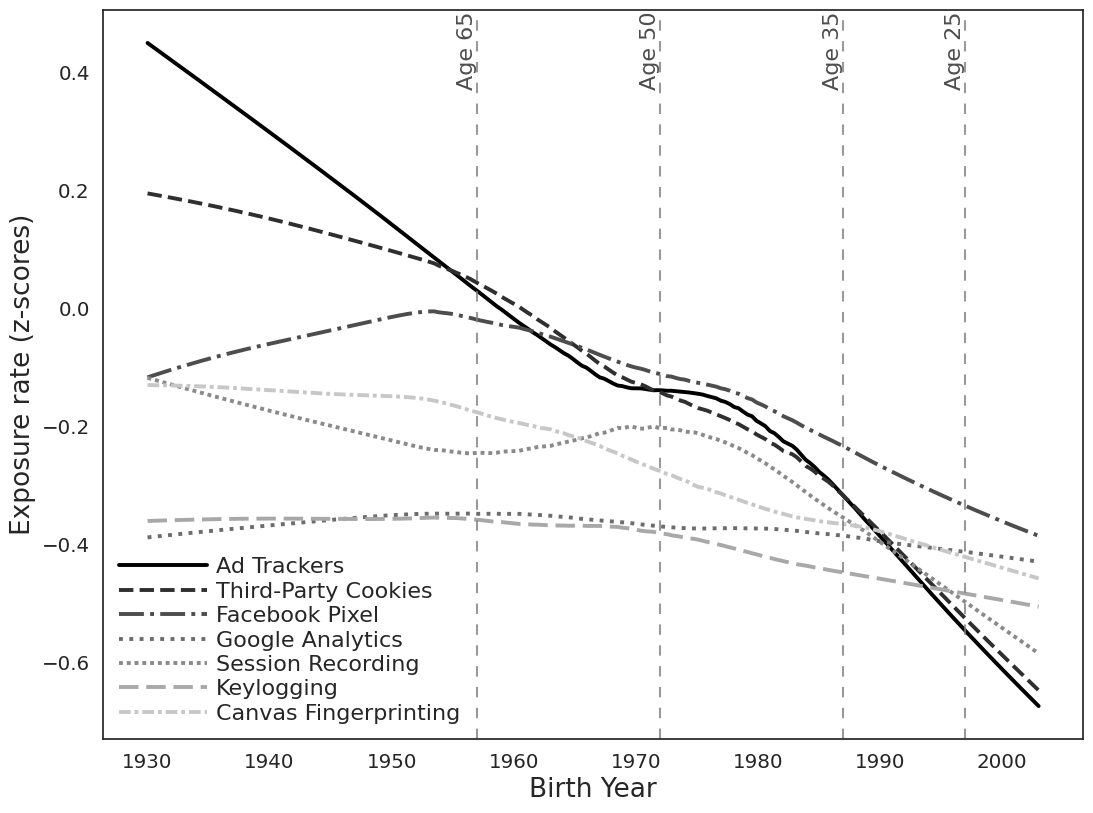

In [21]:
# plot
_scale = .7
_aspect_ratio = (16,12)
figsize = tuple(k * _scale for k in _aspect_ratio)
fig, ax = plt.subplots(figsize=figsize)

# ===============================================================
birthyr_grid = np.linspace(df["birthyr"].min(), df["birthyr"].max(), 200)
ref_ages = [25, 35, 50, 65]
ref_birthyrs = [2022 - age for age in ref_ages]
    
# ===============================================================
for ix, var in enumerate(bl_measures):
    df_plot = df.copy()

    # Winsorize
    low, high = df_plot[var].quantile([0.0, 0.95])
    df_plot[var] = df_plot[var].clip(lower=low, upper=high)

    # z-standardise
    df_plot[var] = (df_plot[var] - df_plot[var].mean()) / df_plot[var].std()

    # LOWESS
    smoothed = lowess(
        endog=df_plot[var],
        exog=df_plot["birthyr"],
        frac=0.5,
        it=3,
        delta=0.0,
        xvals=birthyr_grid,
    )

    ax.plot(
        birthyr_grid,
        smoothed,
        label=var_labels[var],
        linewidth=2.8,
        linestyle=linestyles7[ix],
        color=palette7[ix],
    )

# ===============================================================
# Reference vertical lines for ages
for birthyr, age in zip(ref_birthyrs, ref_ages):
    ax.axvline(x=birthyr, linestyle= (0, (5, 5)), color=".5", alpha=0.8)
    ax.text(
        x=birthyr,
        y=ax.get_ylim()[1] - 0.002,
        s=f"Age {age}",
        rotation=90,
        verticalalignment="top",
        horizontalalignment="right",
        fontsize=16,
        color=".3",
    )

# ===============================================================
# Legend formatting
ax.legend(
    title="",
#     title_fontsize=15,
    fontsize=16,
    loc="lower left",
    frameon=False,
    borderpad=0.2,
    handlelength=4,
    handletextpad=0.4,
    labelspacing=0.2,
)

# ===============================================================
LABEL_SIZE = 19
ax.set_xlabel("Birth Year", fontsize=LABEL_SIZE)
ax.set_ylabel("Exposure rate (z-scores)", fontsize=LABEL_SIZE)

plt.grid(axis="both", visible=False)

plt.tight_layout()
save_mpl_fig("../figures/lowess_age_bl")

## Correlation

In [22]:
x = [
    #  'tt_visits',
    #  'tt_domains',
    "bl_ddg_join_ads_rate",
    "bl_third_party_cookies_rate",
    "bl_fb_pixel_rate",
    "bl_google_analytics_rate",
    "bl_session_recording_rate",
    "bl_key_logging_rate",
    "bl_canvas_fingerprinting_rate",
    "who_trackers_per_page_load_rate",
    "who_tracking_requests_per_page_load_rate",
    #  'who_trackers_requests_all_requests_rate',
    #  'who_data_saved_rate',
    "who_advertising_rate",
    "who_audio_video_player_rate",
    "who_customer_interaction_rate",
    "who_hosting_rate",
    "who_consent_management_rate",
    "who_site_analytics_rate",
    "who_misc_rate",
    "who_utilities_rate",
    "who_social_media_rate",
    "who_adult_advertising_rate",
]
x

['bl_ddg_join_ads_rate',
 'bl_third_party_cookies_rate',
 'bl_fb_pixel_rate',
 'bl_google_analytics_rate',
 'bl_session_recording_rate',
 'bl_key_logging_rate',
 'bl_canvas_fingerprinting_rate',
 'who_trackers_per_page_load_rate',
 'who_tracking_requests_per_page_load_rate',
 'who_advertising_rate',
 'who_audio_video_player_rate',
 'who_customer_interaction_rate',
 'who_hosting_rate',
 'who_consent_management_rate',
 'who_site_analytics_rate',
 'who_misc_rate',
 'who_utilities_rate',
 'who_social_media_rate',
 'who_adult_advertising_rate']

In [23]:
updated_var_labels = {
    k: (
        f"{v} (BL)"
        if k.startswith("bl_")
        else f"{v} (WTM)"
        if k.startswith("who_")
        else v
    )
    for k, v in var_labels.items()
}

df_corr_ = (
    df.select_columns(x).corr().rename(index=updated_var_labels, columns=var_labels)
)
df_corr_

,Ad Trackers,Third-Party Cookies,Facebook Pixel,Google Analytics,Session Recording,Keylogging,Canvas Fingerprinting,Trackers/Page Load,Tracking Requests/Page Load,Advertising,Audio/Video Player,Customer Interaction,Hosting Services,Consent Management,Site Analytics,Miscellaneous,Utilities,Social Media,Adult Advertising
Ad Trackers (BL),1.000000,0.878858,0.370910,0.140661,0.210037,0.509985,0.420473,0.375591,0.274478,0.517268,0.239181,0.440777,0.166087,0.246904,0.475516,0.186767,0.218514,0.285214,-0.042336
Third-Party Cookies (BL),0.878858,1.000000,0.254895,0.180933,0.201716,0.369230,0.465274,0.291232,0.173755,0.375152,0.157893,0.427675,0.158463,0.198185,0.353957,0.291446,0.152219,0.185950,-0.046735
Facebook Pixel (BL),0.370910,0.254895,1.000000,0.390265,0.355750,0.028160,0.275208,0.091159,0.025307,0.100453,-0.024239,0.120289,-0.058807,0.219581,0.275711,-0.185620,0.292937,-0.034562,-0.040392
Google Analytics (BL),0.140661,0.180933,0.390265,1.000000,0.147237,-0.022870,0.245098,-0.009850,-0.009021,-0.030970,-0.022762,0.025831,-0.004480,0.003046,0.066313,-0.085342,0.078765,-0.075476,-0.011368
Session Recording (BL),0.210037,0.201716,0.355750,0.147237,1.000000,0.015897,0.169289,0.041982,-0.025888,0.083937,-0.079639,0.064920,-0.099783,0.079474,0.141872,-0.134106,0.198780,-0.014637,-0.050915
Keylogging (BL),0.509985,0.369230,0.028160,-0.022870,0.015897,1.000000,-0.006338,0.148818,0.157697,0.414180,0.274286,0.243207,0.106524,0.019629,0.233646,0.026996,0.008617,0.367197,-0.067693
Canvas Fingerprinting (BL),0.420473,0.465274,0.275208,0.245098,0.169289,-0.006338,1.000000,0.124637,0.095789,0.046390,-0.072161,0.362081,0.145164,0.088321,0.191156,0.416809,0.287482,-0.060900,-0.042511
Trackers/Page Load (WTM),0.375591,0.291232,0.091159,-0.009850,0.041982,0.148818,0.124637,1.000000,0.522045,0.782585,0.595616,0.512936,0.591022,0.537015,0.754785,0.169603,0.422923,0.558202,-0.002744
Tracking Requests/Page Load (WTM),0.274478,0.173755,0.025307,-0.009021,-0.025888,0.157697,0.095789,0.522045,1.000000,0.605171,0.300226,0.429458,0.304529,0.369004,0.512443,0.291544,0.244833,0.318224,-0.010450
Advertising (WTM),0.517268,0.375152,0.100453,-0.030970,0.083937,0.414180,0.046390,0.782585,0.605171,1.000000,0.516724,0.571842,0.407748,0.540278,0.793862,0.151507,0.347556,0.554797,-0.072914


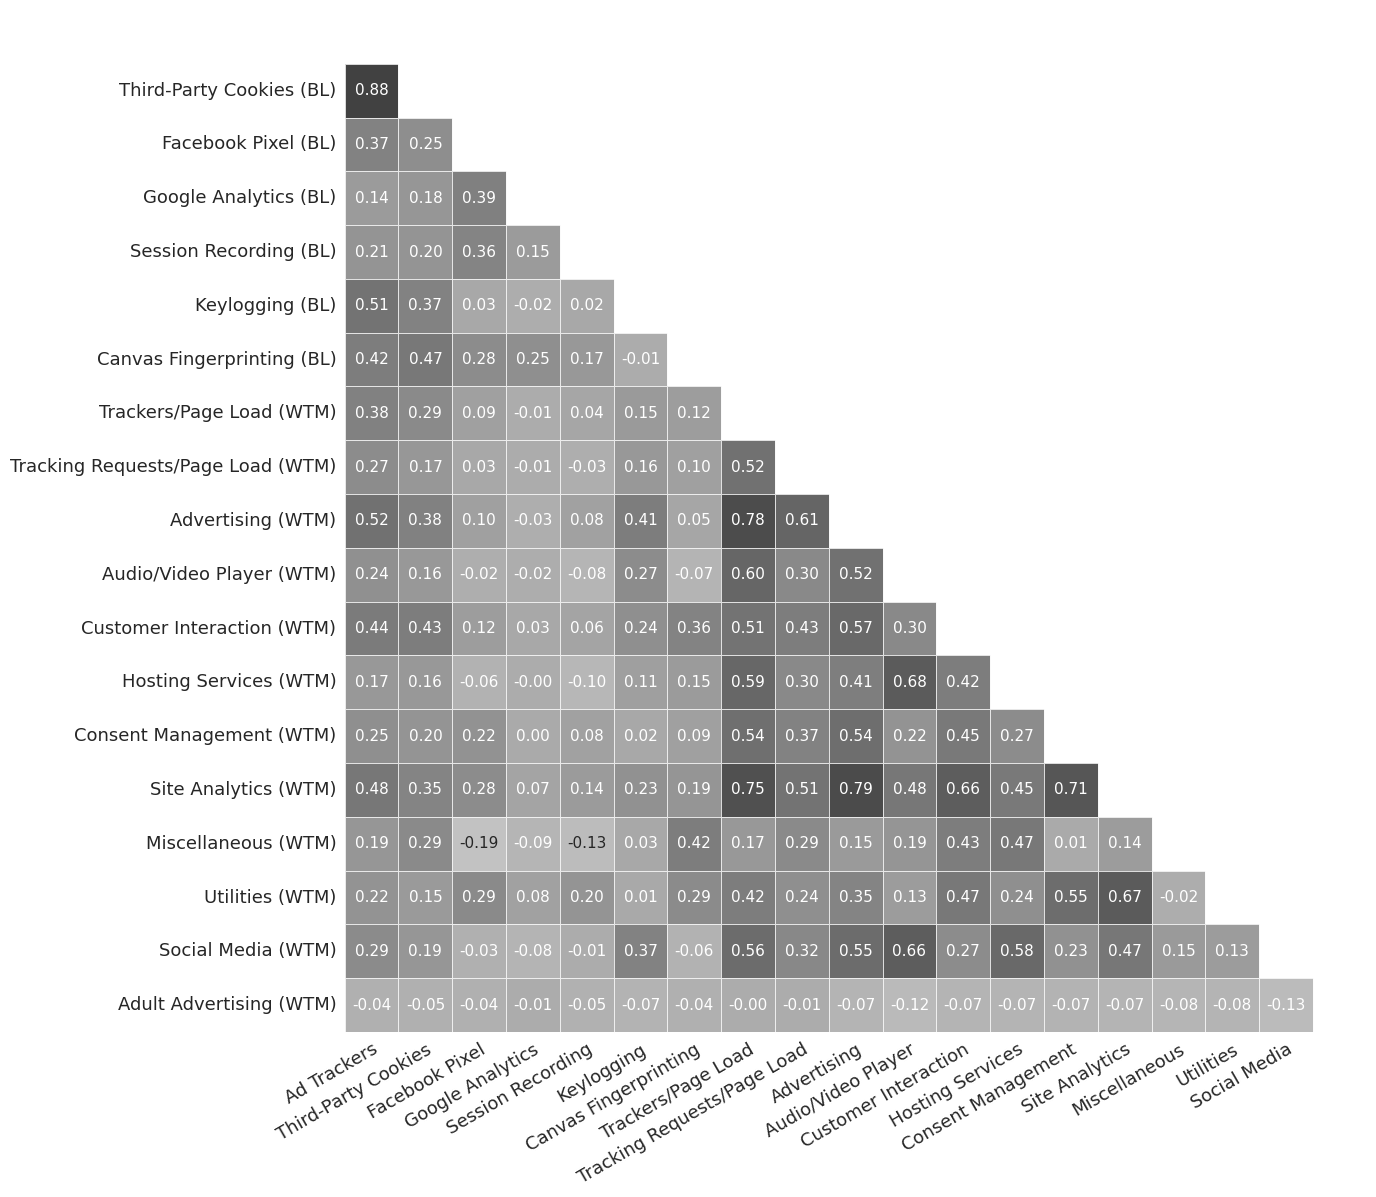

In [24]:
# plot correlations
_scale = 1
_aspect_ratio = (14, 14)
figsize = tuple(k * _scale for k in _aspect_ratio)
fig, ax = plt.subplots(figsize=figsize)

# Heatmap without colorbar for now
sns.heatmap(
    df_corr_,
    # remove upper tri
    mask=np.triu(np.ones_like(df_corr_, dtype=bool)),
    cmap="Greys",
    alpha=0.8,
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    linewidths=0.5,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 11},
    cbar=False,
    ax=ax,
)

# ===============================================================
# # Cbar
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# # Prep axis
# cax = inset_axes(
#     ax,
#     width="5%",
#     height="40%",
#     loc='upper right',
#     bbox_to_anchor=(
#         -0.15,  # x offset
#          -0.1,  # y offs
#          1,     # width scaling: leave it at 100% of parent box (not used here)
#          1      # height scaling: same as above
#     ),
#     # relative position
#     bbox_transform=ax.transAxes,
#     borderpad=0,
# )

# # Add colorbar
# norm = plt.Normalize(vmin=-1, vmax=1)
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# cbar = fig.colorbar(sm, cax=cax, orientation="vertical")
# cbar.set_label("Correlation", fontsize=11)
# cbar.ax.tick_params(labelsize=9)

# ===============================================================
yticklabels = ax.get_yticklabels()
# remove first redundant label
yticklabels[0] = ""
ax.set_yticklabels(yticklabels)

xticklabels = [label.get_text() for label in ax.get_xticklabels()]
# remove last redundant label
xticklabels[-1] = ""
ax.set_xticklabels(xticklabels, rotation=30, ha="right", rotation_mode="anchor")

ax.tick_params(axis="both", labelsize=13, pad=0)

plt.tight_layout()
save_mpl_fig("../figures/bl_wtm_correlation")

### BL + WTM tarckers/page

In [25]:
x = [
    #  'tt_visits',
    #  'tt_domains',
    "bl_ddg_join_ads_rate",
    "bl_third_party_cookies_rate",
    "bl_fb_pixel_rate",
    "bl_google_analytics_rate",
    "bl_session_recording_rate",
    "bl_key_logging_rate",
    "bl_canvas_fingerprinting_rate",
    "who_trackers_per_page_load_rate",
]
x

['bl_ddg_join_ads_rate',
 'bl_third_party_cookies_rate',
 'bl_fb_pixel_rate',
 'bl_google_analytics_rate',
 'bl_session_recording_rate',
 'bl_key_logging_rate',
 'bl_canvas_fingerprinting_rate',
 'who_trackers_per_page_load_rate']

In [26]:
updated_var_labels = {
    k: (
        f"{v} (BL)"
        if k.startswith("bl_")
        else f"{v} (WTM)"
        if k.startswith("who_")
        else v
    )
    for k, v in var_labels.items()
}

df_corr_ = (
    df
    .reorder_columns(x)
    .select_columns(x).corr().rename(index=updated_var_labels, columns=var_labels)
)
df_corr_

,Ad Trackers,Third-Party Cookies,Facebook Pixel,Google Analytics,Session Recording,Keylogging,Canvas Fingerprinting,Trackers/Page Load
Ad Trackers (BL),1.000000,0.878858,0.370910,0.140661,0.210037,0.509985,0.420473,0.375591
Third-Party Cookies (BL),0.878858,1.000000,0.254895,0.180933,0.201716,0.369230,0.465274,0.291232
Facebook Pixel (BL),0.370910,0.254895,1.000000,0.390265,0.355750,0.028160,0.275208,0.091159
Google Analytics (BL),0.140661,0.180933,0.390265,1.000000,0.147237,-0.022870,0.245098,-0.009850
Session Recording (BL),0.210037,0.201716,0.355750,0.147237,1.000000,0.015897,0.169289,0.041982
Keylogging (BL),0.509985,0.369230,0.028160,-0.022870,0.015897,1.000000,-0.006338,0.148818
Canvas Fingerprinting (BL),0.420473,0.465274,0.275208,0.245098,0.169289,-0.006338,1.000000,0.124637
Trackers/Page Load (WTM),0.375591,0.291232,0.091159,-0.009850,0.041982,0.148818,0.124637,1.000000


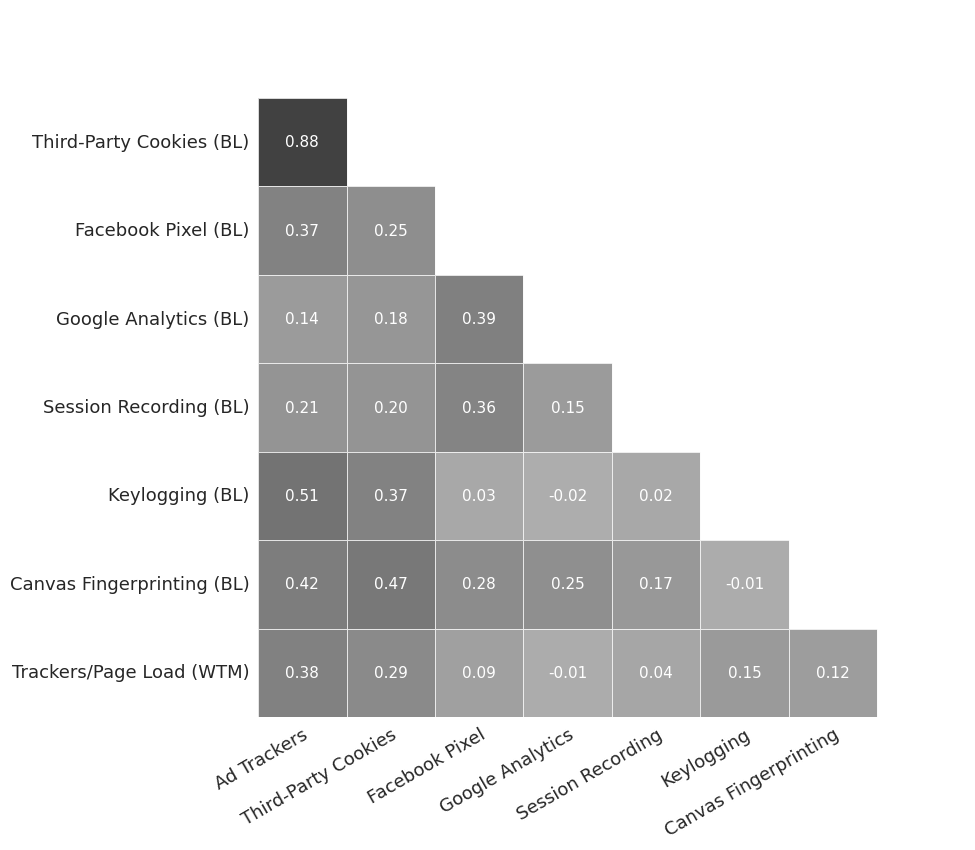

In [27]:
# plot correlations
_scale = 1
_aspect_ratio = (10, 10)
figsize = tuple(k * _scale for k in _aspect_ratio)
fig, ax = plt.subplots(figsize=figsize)

# Heatmap without colorbar for now
sns.heatmap(
    df_corr_,
    # remove upper tri
    mask=np.triu(np.ones_like(df_corr_, dtype=bool)),
    cmap="Greys",
    alpha=0.8,
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    linewidths=0.5,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 11},
    cbar=False,
    ax=ax,
)

# ===============================================================
yticklabels = ax.get_yticklabels()
# remove first redundant label
yticklabels[0] = ""
ax.set_yticklabels(yticklabels)

xticklabels = [label.get_text() for label in ax.get_xticklabels()]
# remove last redundant label
xticklabels[-1] = ""
ax.set_xticklabels(xticklabels, rotation=30, ha="right", rotation_mode="anchor")

ax.tick_params(axis="both", labelsize=13, pad=0)

plt.tight_layout()
save_mpl_fig("../figures/bl_wtm_correlation_truncated")

### BL + WTM tarckers/page -- cumulative

In [28]:
x = [
    "bl_ddg_join_ads",
    "bl_third_party_cookies",
    "bl_fb_pixel",
    "bl_google_analytics",
    "bl_session_recording",
    "bl_key_logging",
    "bl_canvas_fingerprinting",
    "who_trackers_per_page_load",
]
x

['bl_ddg_join_ads',
 'bl_third_party_cookies',
 'bl_fb_pixel',
 'bl_google_analytics',
 'bl_session_recording',
 'bl_key_logging',
 'bl_canvas_fingerprinting',
 'who_trackers_per_page_load']

In [29]:
updated_var_labels = {
    k: (
        f"{v} (BL)"
        if k.startswith("bl_")
        else f"{v} (WTM)"
        if k.startswith("who_")
        else v
    )
    for k, v in var_labels.items()
}

df_corr_ = (
    df
    .reorder_columns(x)
    .select_columns(x).corr().rename(index=updated_var_labels, columns=var_labels)
)
df_corr_

,Ad Trackers,Third-Party Cookies,Facebook Pixel,Google Analytics,Session Recording,Keylogging,Canvas Fingerprinting,Trackers/Page Load
Ad Trackers (BL),1.000000,0.957219,0.718085,0.320955,0.557317,0.717951,0.568111,0.825593
Third-Party Cookies (BL),0.957219,1.000000,0.704213,0.329835,0.602717,0.646719,0.625502,0.805067
Facebook Pixel (BL),0.718085,0.704213,1.000000,0.389857,0.612187,0.381906,0.645294,0.684817
Google Analytics (BL),0.320955,0.329835,0.389857,1.000000,0.255496,0.202954,0.286493,0.349201
Session Recording (BL),0.557317,0.602717,0.612187,0.255496,1.000000,0.289561,0.434341,0.478441
Keylogging (BL),0.717951,0.646719,0.381906,0.202954,0.289561,1.000000,0.233634,0.561689
Canvas Fingerprinting (BL),0.568111,0.625502,0.645294,0.286493,0.434341,0.233634,1.000000,0.541759
Trackers/Page Load (WTM),0.825593,0.805067,0.684817,0.349201,0.478441,0.561689,0.541759,1.000000


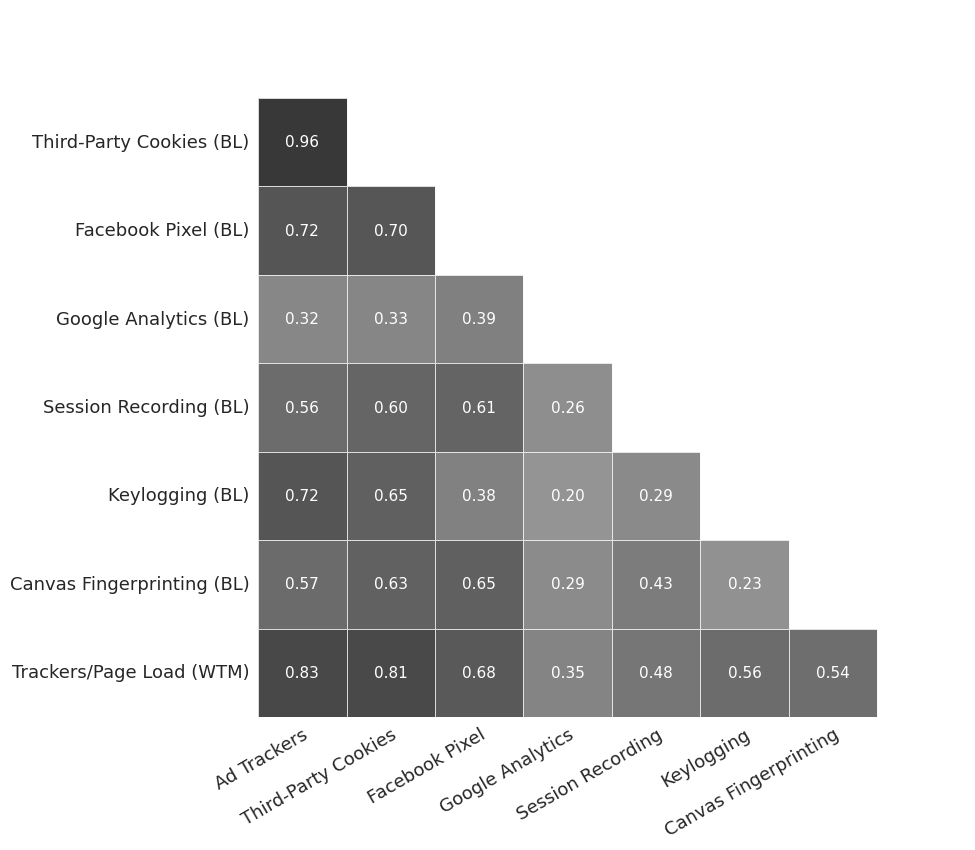

In [30]:
# plot correlations
_scale = 1
_aspect_ratio = (10, 10)
figsize = tuple(k * _scale for k in _aspect_ratio)
fig, ax = plt.subplots(figsize=figsize)

# Heatmap without colorbar for now
sns.heatmap(
    df_corr_,
    # remove upper tri
    mask=np.triu(np.ones_like(df_corr_, dtype=bool)),
    cmap="Greys",
    alpha=0.8,
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    linewidths=0.5,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 11},
    cbar=False,
    ax=ax,
)

# ===============================================================
yticklabels = ax.get_yticklabels()
# remove first redundant label
yticklabels[0] = ""
ax.set_yticklabels(yticklabels)

xticklabels = [label.get_text() for label in ax.get_xticklabels()]
# remove last redundant label
xticklabels[-1] = ""
ax.set_xticklabels(xticklabels, rotation=30, ha="right", rotation_mode="anchor")

ax.tick_params(axis="both", labelsize=13, pad=0)

plt.tight_layout()
# save_mpl_fig("../figures/bl_wtm_correlation_truncated")